In [13]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28**2) / 255.0
x_test = x_test.reshape(-1, 28**2) / 255.0

In [3]:
# subsample x_train
n_train_per_label = 1000
new_examples = []
for i in range(10):
    subset = x_train[y_train==i]
    choices = np.random.choice(len(subset), n_train_per_label, False)
    new_examples.append(subset[choices])
x_train = np.concatenate(new_examples, 0)
y_train = np.repeat(np.arange(10), n_train_per_label)

In [4]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', verbose=True, max_iter=500)

In [5]:
model.fit(x_train, y_train)
pred_y = model.predict(x_test)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.9s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=True, warm_start=False)

In [6]:
print('accuracy=%.2f'%model.score(x_test, y_test))

accuracy=0.91


Text(0.5,1,'Confusion Matrix')

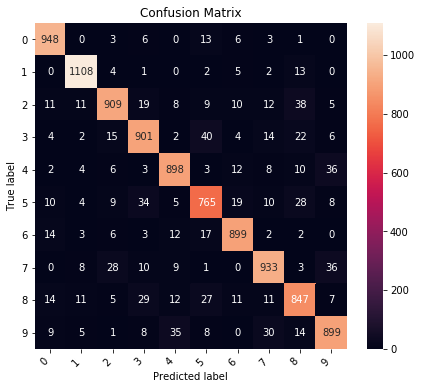

In [18]:
conf_mat = metrics.confusion_matrix(y_test, pred_y)
class_names = list(range(10))
df_cm = pd.DataFrame(
    conf_mat, index=class_names, columns=class_names, 
)
fig = plt.figure(figsize=(7, 6))
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')